In [3]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import glob
import matplotlib
matplotlib.style.use('ggplot') 

In [34]:
RESULTS_DIR = "/p/project/laionize/marianna/caption_internet/benchmark_results"

results = glob.glob(RESULTS_DIR + "/*.json")
results = [{**json.load(open(r)), **{'model': r.split('/')[-1].replace('.json', '')}} for r in results]


cols = ["clip_score", "eval_time", "samples_per_sec", "mem_usage"]
outputs = pd.DataFrame([[ {**{col:r[col] for col in cols}, **{'model': result['model'], 'quant': result['quant'], 'batch_size': result['batch_size']}} for r in result["output"]][0] for result in results])




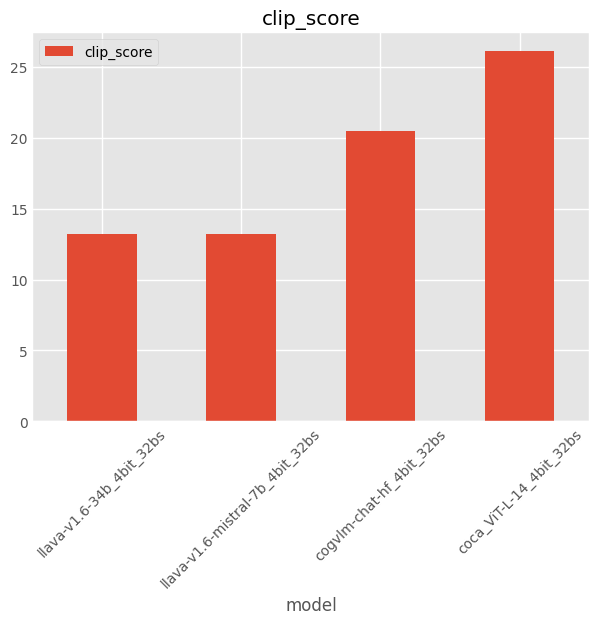

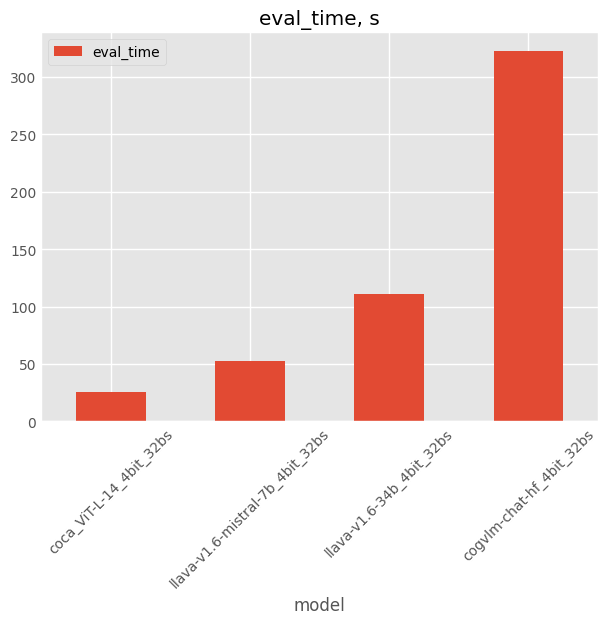

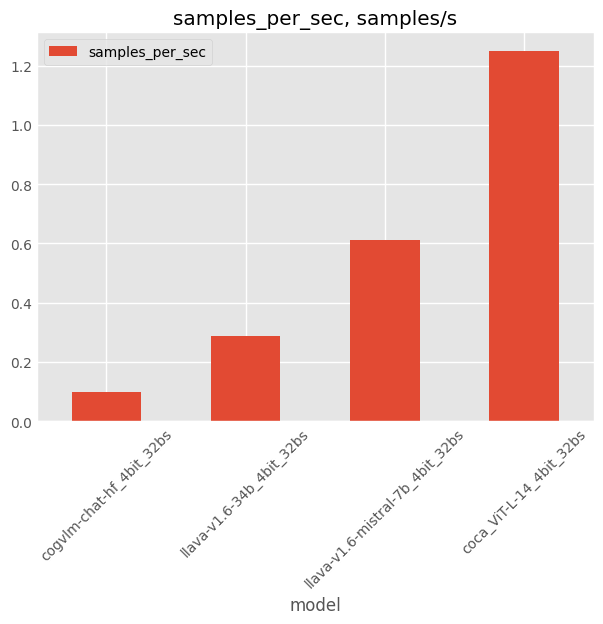

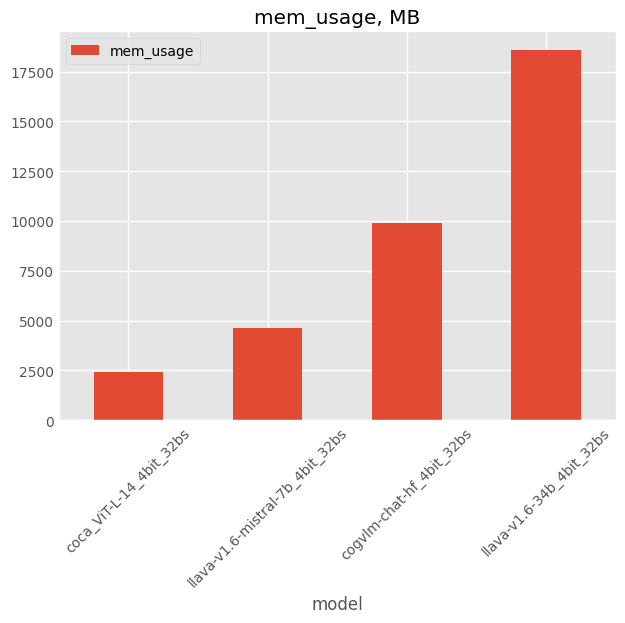

In [35]:
units = {
    "eval_time": ", s",
    "samples_per_sec": ", samples/s",
    "mem_usage": ", MB",
    "clip_score": ""
}

for col in cols:
    outputs.sort_values(col).plot(x='model', y=col, kind='bar', title=col + units[col], rot=45)
    plt.show()
# outputs.sort_values('clip_score').plot(x='model', y='clip_score', kind='bar', title='Clip Score', rot=45)

In [32]:
cols = ["model", "quant", "batch_size", "clip_score", "eval_time", "samples_per_sec", "mem_usage"]
outputs[cols]

,model,quant,batch_size,clip_score,eval_time,samples_per_sec,mem_usage
0,coca_ViT-L-14_4bit_32bs,4,32,26.1263,25.607133,1.249652,2444.364258
1,moodream2_4bit_32bs,4,32,19.9147,24.180045,1.323405,1302.346680
2,cogvlm-chat-hf_4bit_32bs,4,32,20.4900,322.783433,0.099138,9927.346191
3,llava-v1.6-34b_4bit_32bs,4,32,13.2470,110.909673,0.288523,18588.471191
4,llava-v1.6-mistral-7b_4bit_32bs,4,32,13.2470,52.185459,0.613198,4638.866211
